<a href="https://colab.research.google.com/github/Aadi-RE350/Math-for-ML/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Sythesising datapoints
from sklearn.datasets import make_regression
X ,y, coef= make_regression(n_samples=100, n_features=1, noise=10, random_state=42, coef=True)
X,y = np.array(X).flatten(),np.array(y)
print(X.shape,y.shape,coef)

(100,) (100,) 41.7411003148779


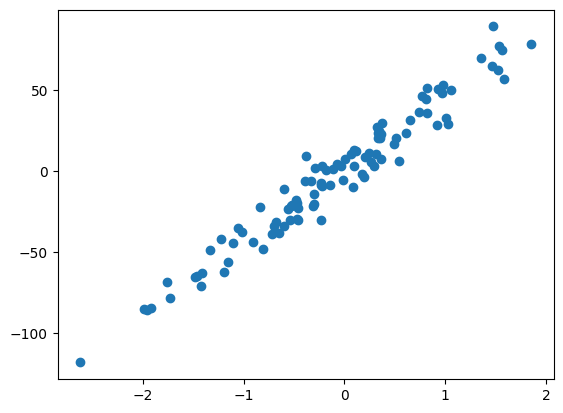

In [69]:
plt.scatter(X,y)

In [70]:
# linear regression fn
def lr(X,m,c): # m => slope, c => intercept-y
  y_pred = m*X + c
  return y_pred

def mse(y_true,y_pred):
  # mean sq error
  err = (y_true - y_pred)**2
  return np.mean(err)


In [71]:
# traning loop
def optimize(X, y, lr_rate=0.001, epochs=1000):
    m, c = 0.0, 0.0
    n = len(X)
    errors = []

    for _ in range(epochs):
        y_pred = lr(X, m, c)

        # gradients
        dm = (-2/n) * np.sum(X * (y - y_pred))
        dc = (-2/n) * np.sum(y - y_pred)

        # update
        m -= lr_rate * dm
        c -= lr_rate * dc

        errors.append(mse(y, y_pred))

    return m, c, errors


Slope (m): 44.437, Intercept (c): 1.165
Training error: 78.054


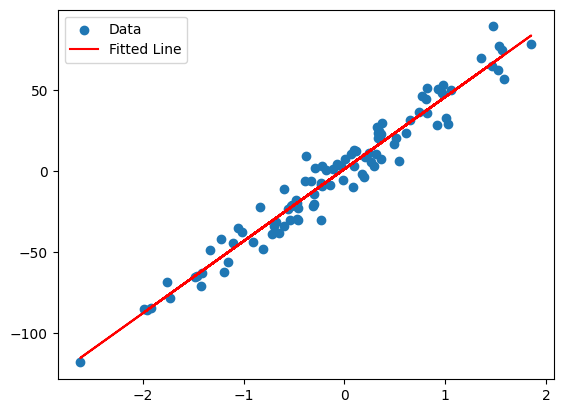

In [74]:
m, c, errors = optimize(X, y, lr_rate=0.01, epochs=1000)
print(f"Slope (m): {m:.3f}, Intercept (c): {c:.3f}")
print(f"Training error: {errors[-1]:.3f}")

# Plot fitted line
plt.scatter(X, y, label="Data")
plt.plot(X, lr(X, m, c), color="red", label="Fitted Line")
plt.legend()
plt.show()


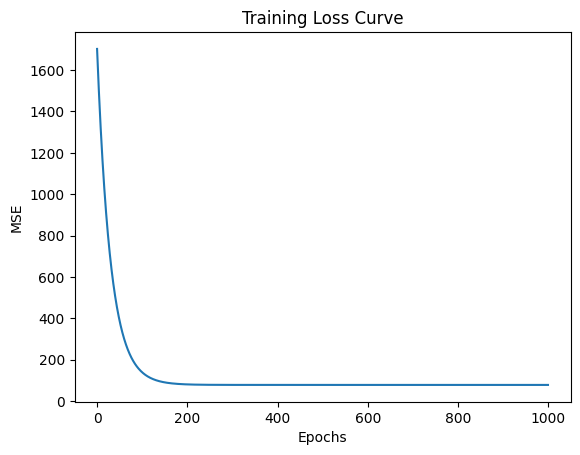

In [75]:
# Plot loss curve
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("Training Loss Curve")
plt.show()